### # BI - Laboratorio 1

Manuel Felipe Carvajal - 202014203
Juanita Gil - 
Estudiante 3: Manuel Carvajal


## 0. Imports

In [126]:
# -------------------------------------------
# Librerías para manipulación y cálculo numérico
import numpy as np
import pandas as pd

# Configuración de pandas para visualizar más filas y columnas
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

# -------------------------------------------
# Utilidades para guardar y cargar modelos
from joblib import dump, load

# -------------------------------------------
# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------------
# Herramientas de scikit-learn para preparación de datos y modelado
# División de datos, regresión lineal y creación de pipelines y transformaciones
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# Métricas para evaluar el modelo de regresión
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -------------------------------------------
# Funciones estadísticas adicionales
import scipy.stats as stats



## 1. Carga de datos
En esta sección se explica cómo se carga el conjunto de datos que se utilizará a lo largo del laboratorio. Se suele emplear la función pd.read_csv (o funciones similares) para leer archivos con formato CSV, Excel u otros, permitiendo convertir la información en un DataFrame de pandas. Así, se asegura que la data esté disponible para realizar análisis exploratorio, procesamiento y modelado posterior.

In [127]:
# 1. Cargar dataset de entrenamiento
df = pd.read_csv("datos_entrenamiento_laboratorio1(train_data).csv")

## 2. Entendimiento de los datos
Se realizará un perfilamiento de los datos utlizando pandas_profiling para obtener una visión general que nos permita identificar potenciales problemas en variables específicas y en las relaciones entre ellas. Después, se efectuará un análisis numérico a través de gráficas de dispersión e histogramas para estudiar la distribución y la correlación de las variables cuantitativas. Paralelamente, se llevará a cabo un análisis categórico utilizando histogramas para visualizar la variación y detectar outliers en las variables cualitativas. Además, se incluirá un análisis de calidad de los datos que evaluará la completitud, unicidad, consistencia y validez de la información disponible.

### 2.1 Primer análisis de variables numéricas y categoricas


#### 2.1.1 Vista general
El dataset contiene aproximadamente 58 mil registros y 50 variables.  
Se identifican 3 variables categóricas principales (`Jugador`, `Nacionalidad`, `Posicion`), la variable objetivo `market_value` y más de 40 variables numéricas con métricas de rendimiento.  
Esto confirma que la granularidad corresponde a jugadores individuales en una temporada, sin variables temporales como partidos o fechas (excepto `contract_date`, que no está completa).


In [128]:
df.info()
df.describe(include="all").T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57934 entries, 0 to 57933
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Jugador                         57934 non-null  object 
 1   Nacionalidad                    57902 non-null  object 
 2   Posicion                        57934 non-null  object 
 3   Edad                            57886 non-null  object 
 4   Dia_partido                     57934 non-null  object 
 5   Goles                           57934 non-null  int64  
 6   Tiros Totales                   57934 non-null  int64  
 7   xG                              57934 non-null  float64
 8   npxG                            57934 non-null  float64
 9   xAG                             57934 non-null  float64
 10  xAG.1                           57934 non-null  float64
 11  Acciones_que_crean_tiros        57934 non-null  int64  
 12  Pases_intentados                

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Jugador,57934,2242,Vitinha,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nacionalidad,57902,110,fr FRA,9351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Posicion,57934,452,CB,9537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Edad,57886,7114,24-231,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dia_partido,57934,198,"Saturday May 10, 2025",997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Goles,57934.0,NaN,NaN,NaN,0.513015,16.4406,-5.0,0.0,0.0,0.0,995.0
Tiros Totales,57934.0,NaN,NaN,NaN,0.792402,1.158538,0.0,0.0,0.0,1.0,12.0
xG,57934.0,NaN,NaN,NaN,0.088635,0.20981,0.0,0.0,0.0,0.1,2.9
npxG,57934.0,NaN,NaN,NaN,0.080473,0.186549,0.0,0.0,0.0,0.1,2.9
xAG,57934.0,NaN,NaN,NaN,0.062784,0.152033,0.0,0.0,0.0,0.1,2.1


#### 2.1.2 Completitud (nulos), duplicados y cardinalidad
La variable "market_value" presenta varios valores nulos, por lo que estos registros no son útiles en entrenamiento.  Tambien, se encontro que variables como xAG tienen columnas duplicados, lo que confirma que hay redundancia en los datos.  
"%_de_regates_exitosos" y "%_de_duelos_aereos_ganados" tienen muchos valores nulos, lo cual compromete su uso directo. En cuanto a cardinalidad, "Nacionalidad" tiene decenas de categorías (más de 100 países), lo cual genera alta cardinalidad y puede requerir agrupar países con poca frecuencia.  
 "Posicion" presenta pocas categorías claras (GK, DF, MF, FW), por lo que es adecuada para un OneHotEncoding.


In [129]:
# Porcentaje de nulos por categoria
print("Porcentaje de valores nulos por variable")
print("                                        ")
print(df.isna().mean().sort_values(ascending=False).head(15))

# Conteo de duplicados
print("                                        ")
print("Cuantos valores duplicados tenemos")
print(df.duplicated().sum())
print("                                        ")

# Cardinalidad de categóricas
print("Cardinalidad por categoria")
cat_cols = ["Nacionalidad", "Posicion"]
for c in cat_cols:
    print(c, "→", df[c].nunique(), "categorías")


Porcentaje de valores nulos por variable
                                        
%_de_regates_exitosos         0.495771
%_de_duelos_aereos_ganados    0.361739
contract_date                 0.222943
market_value                  0.222564
Edad                          0.000829
Nacionalidad                  0.000552
Jugador                       0.000000
Posicion                      0.000000
Dia_partido                   0.000000
Goles                         0.000000
xAG.1                         0.000000
Acciones_que_crean_tiros      0.000000
Pases_intentados              0.000000
Pases_intentados.1            0.000000
Tiros Totales                 0.000000
dtype: float64
                                        
Cuantos valores duplicados tenemos
10483
                                        
Cardinalidad por categoria
Nacionalidad → 110 categorías
Posicion → 452 categorías


### 2.1.3 Distribuciones de variables numericas
En esta sección se explorará la distribución y relaciones de las variables numéricas relevantes del conjunto de datos. Se utilizarán gráficas de dispersión para visualizar la relación entre pares de variables de interés y detectar patrones o posibles outliers. Asimismo, se generarán histogramas para analizar la distribución de cada variable, permitiendo identificar sesgos o concentraciones inusuales. Estas visualizaciones serán fundamentales para entender el comportamiento de la data antes de proceder con transformaciones o modelado.

Columnas numéricas válidas para graficar: ['Edad', 'Goles', 'Tiros Totales', 'xG', 'npxG', 'xAG', 'Regates_exitosos', 'Pases_medios_completados', 'Pases_largos_completados', 'Pases_completados', 'xA', '%_de_regates_exitosos', 'Duelos_aereos_ganados', '%_de_duelos_aereos_ganados', 'market_value', 'Valla_no_vencida']


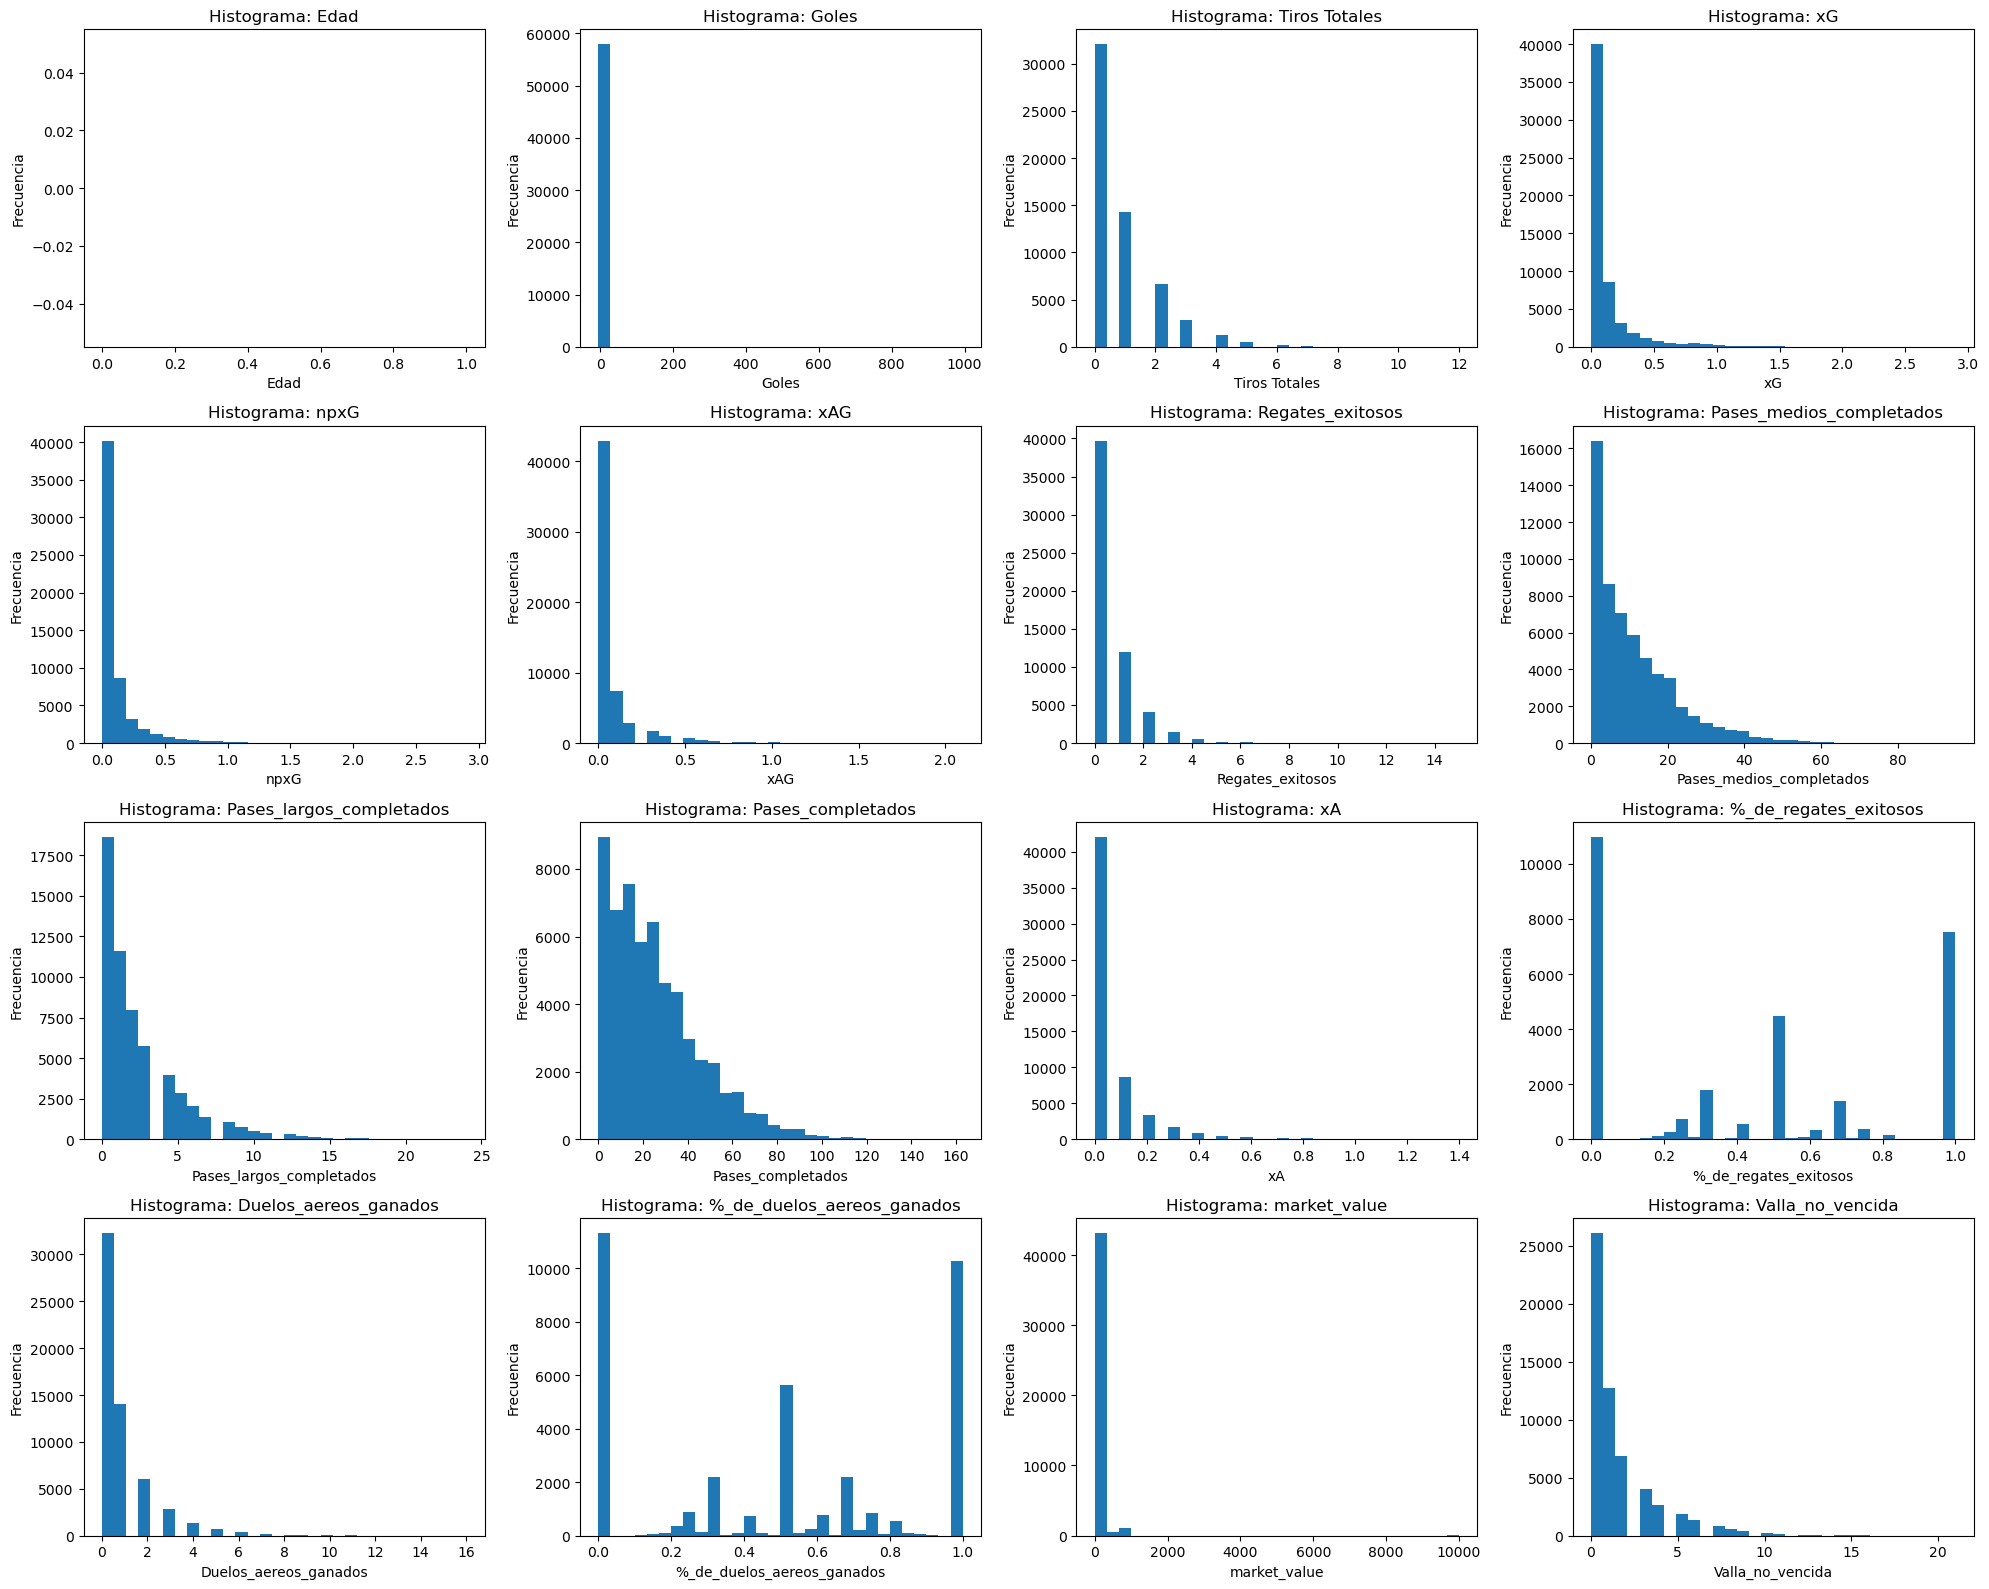

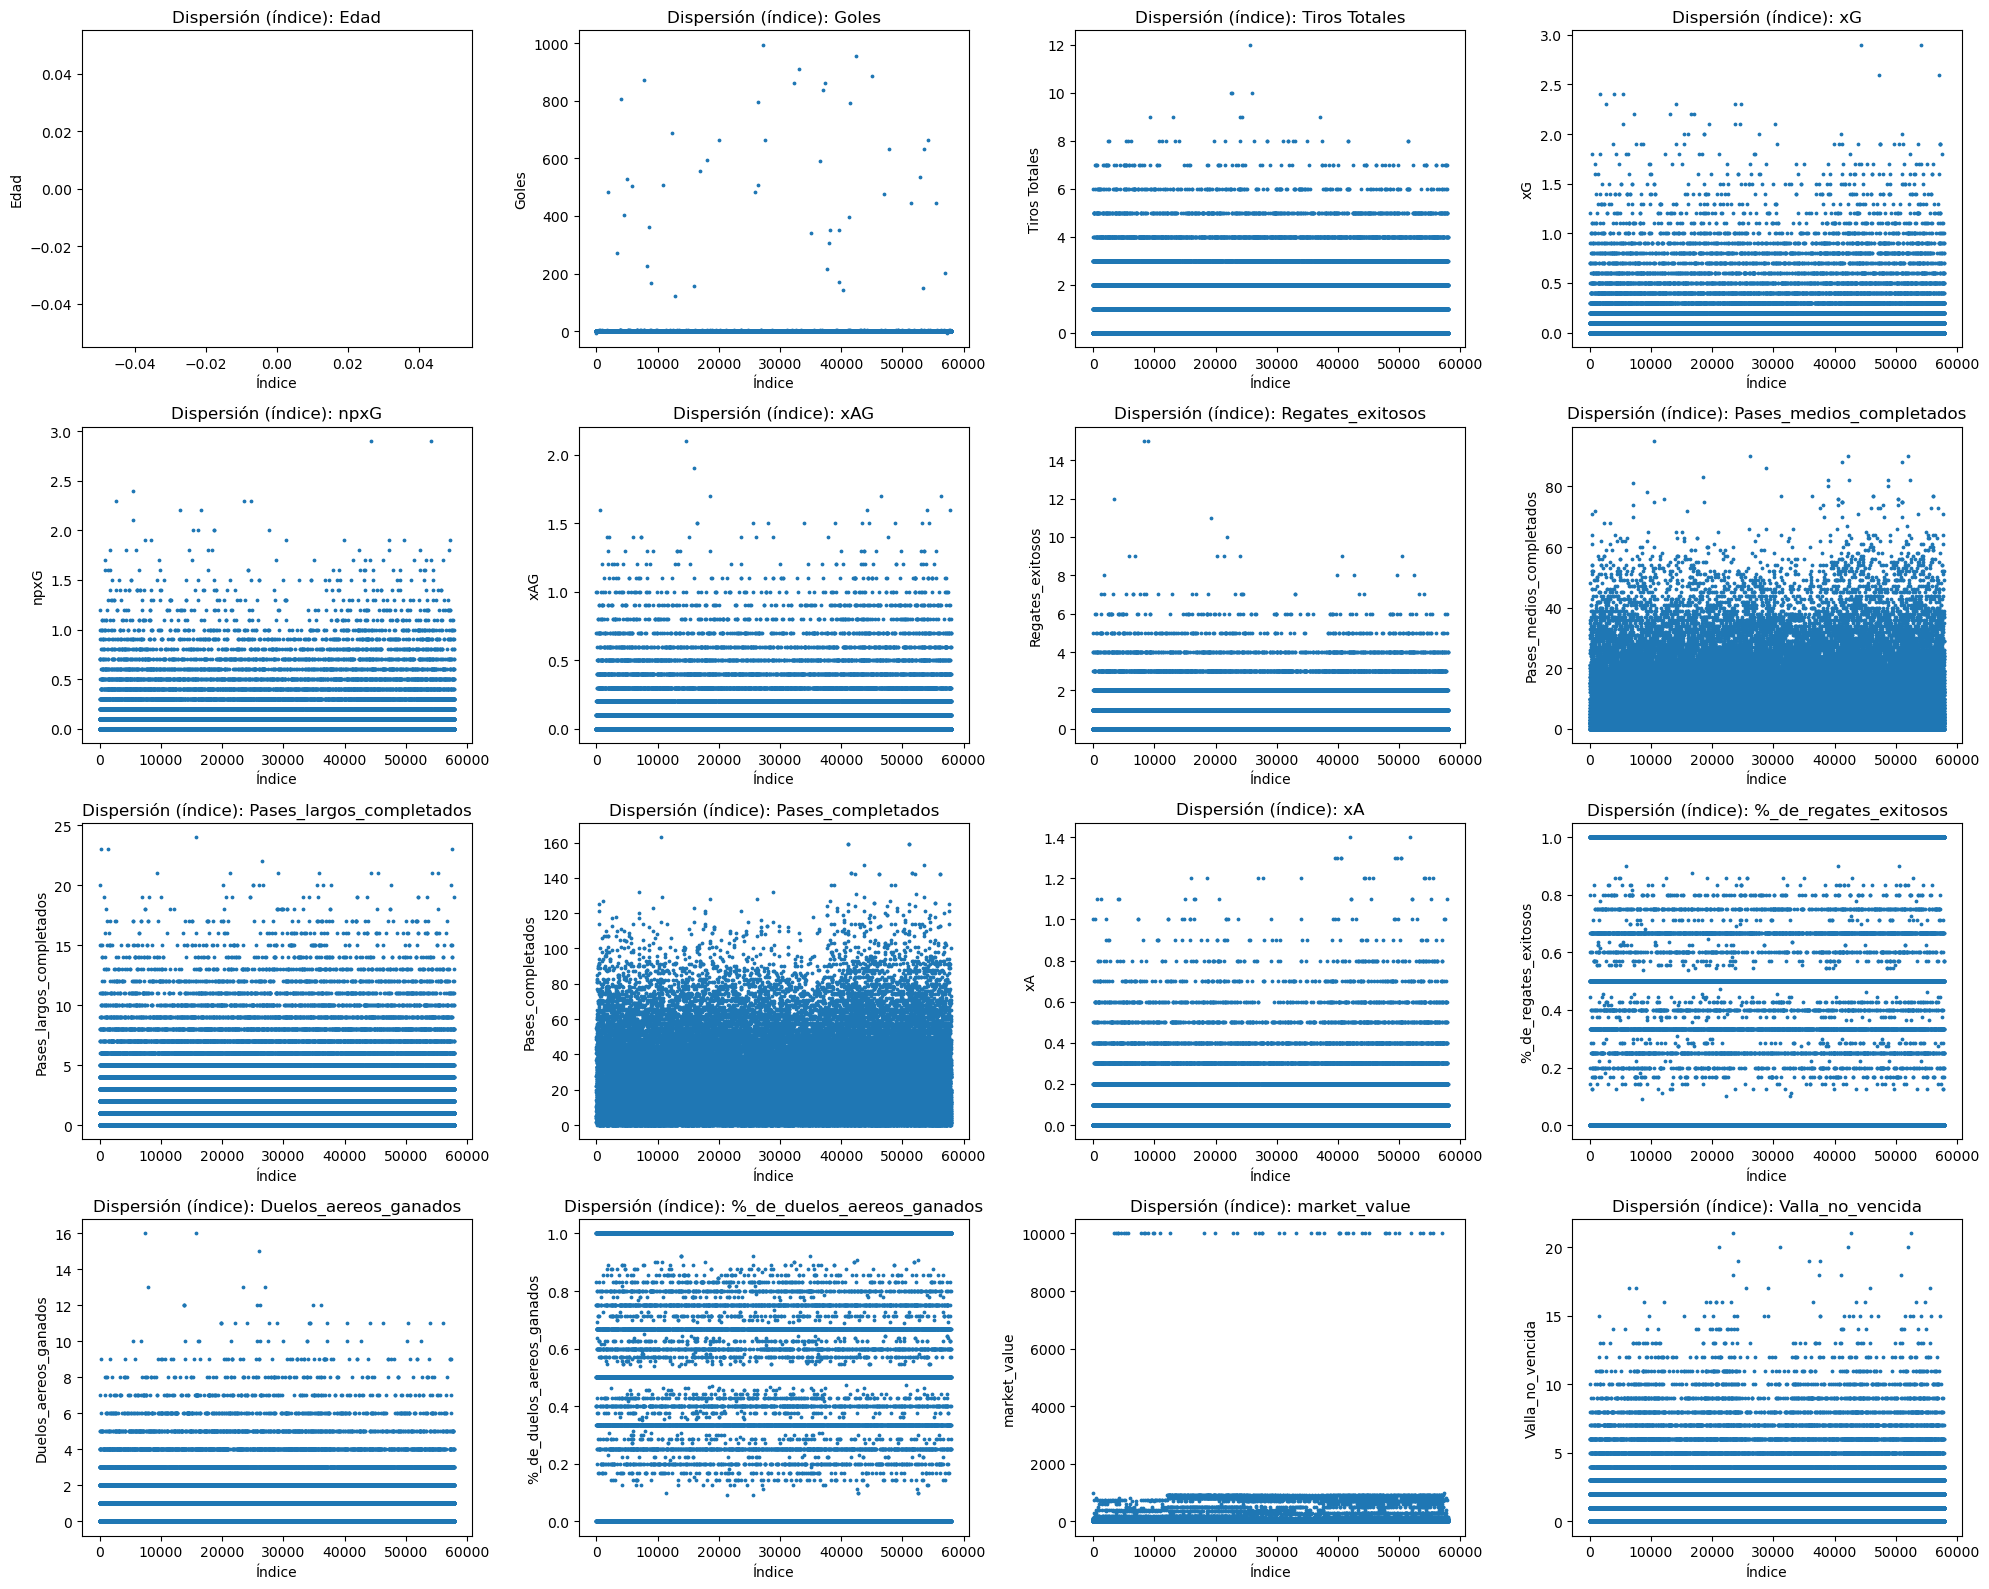

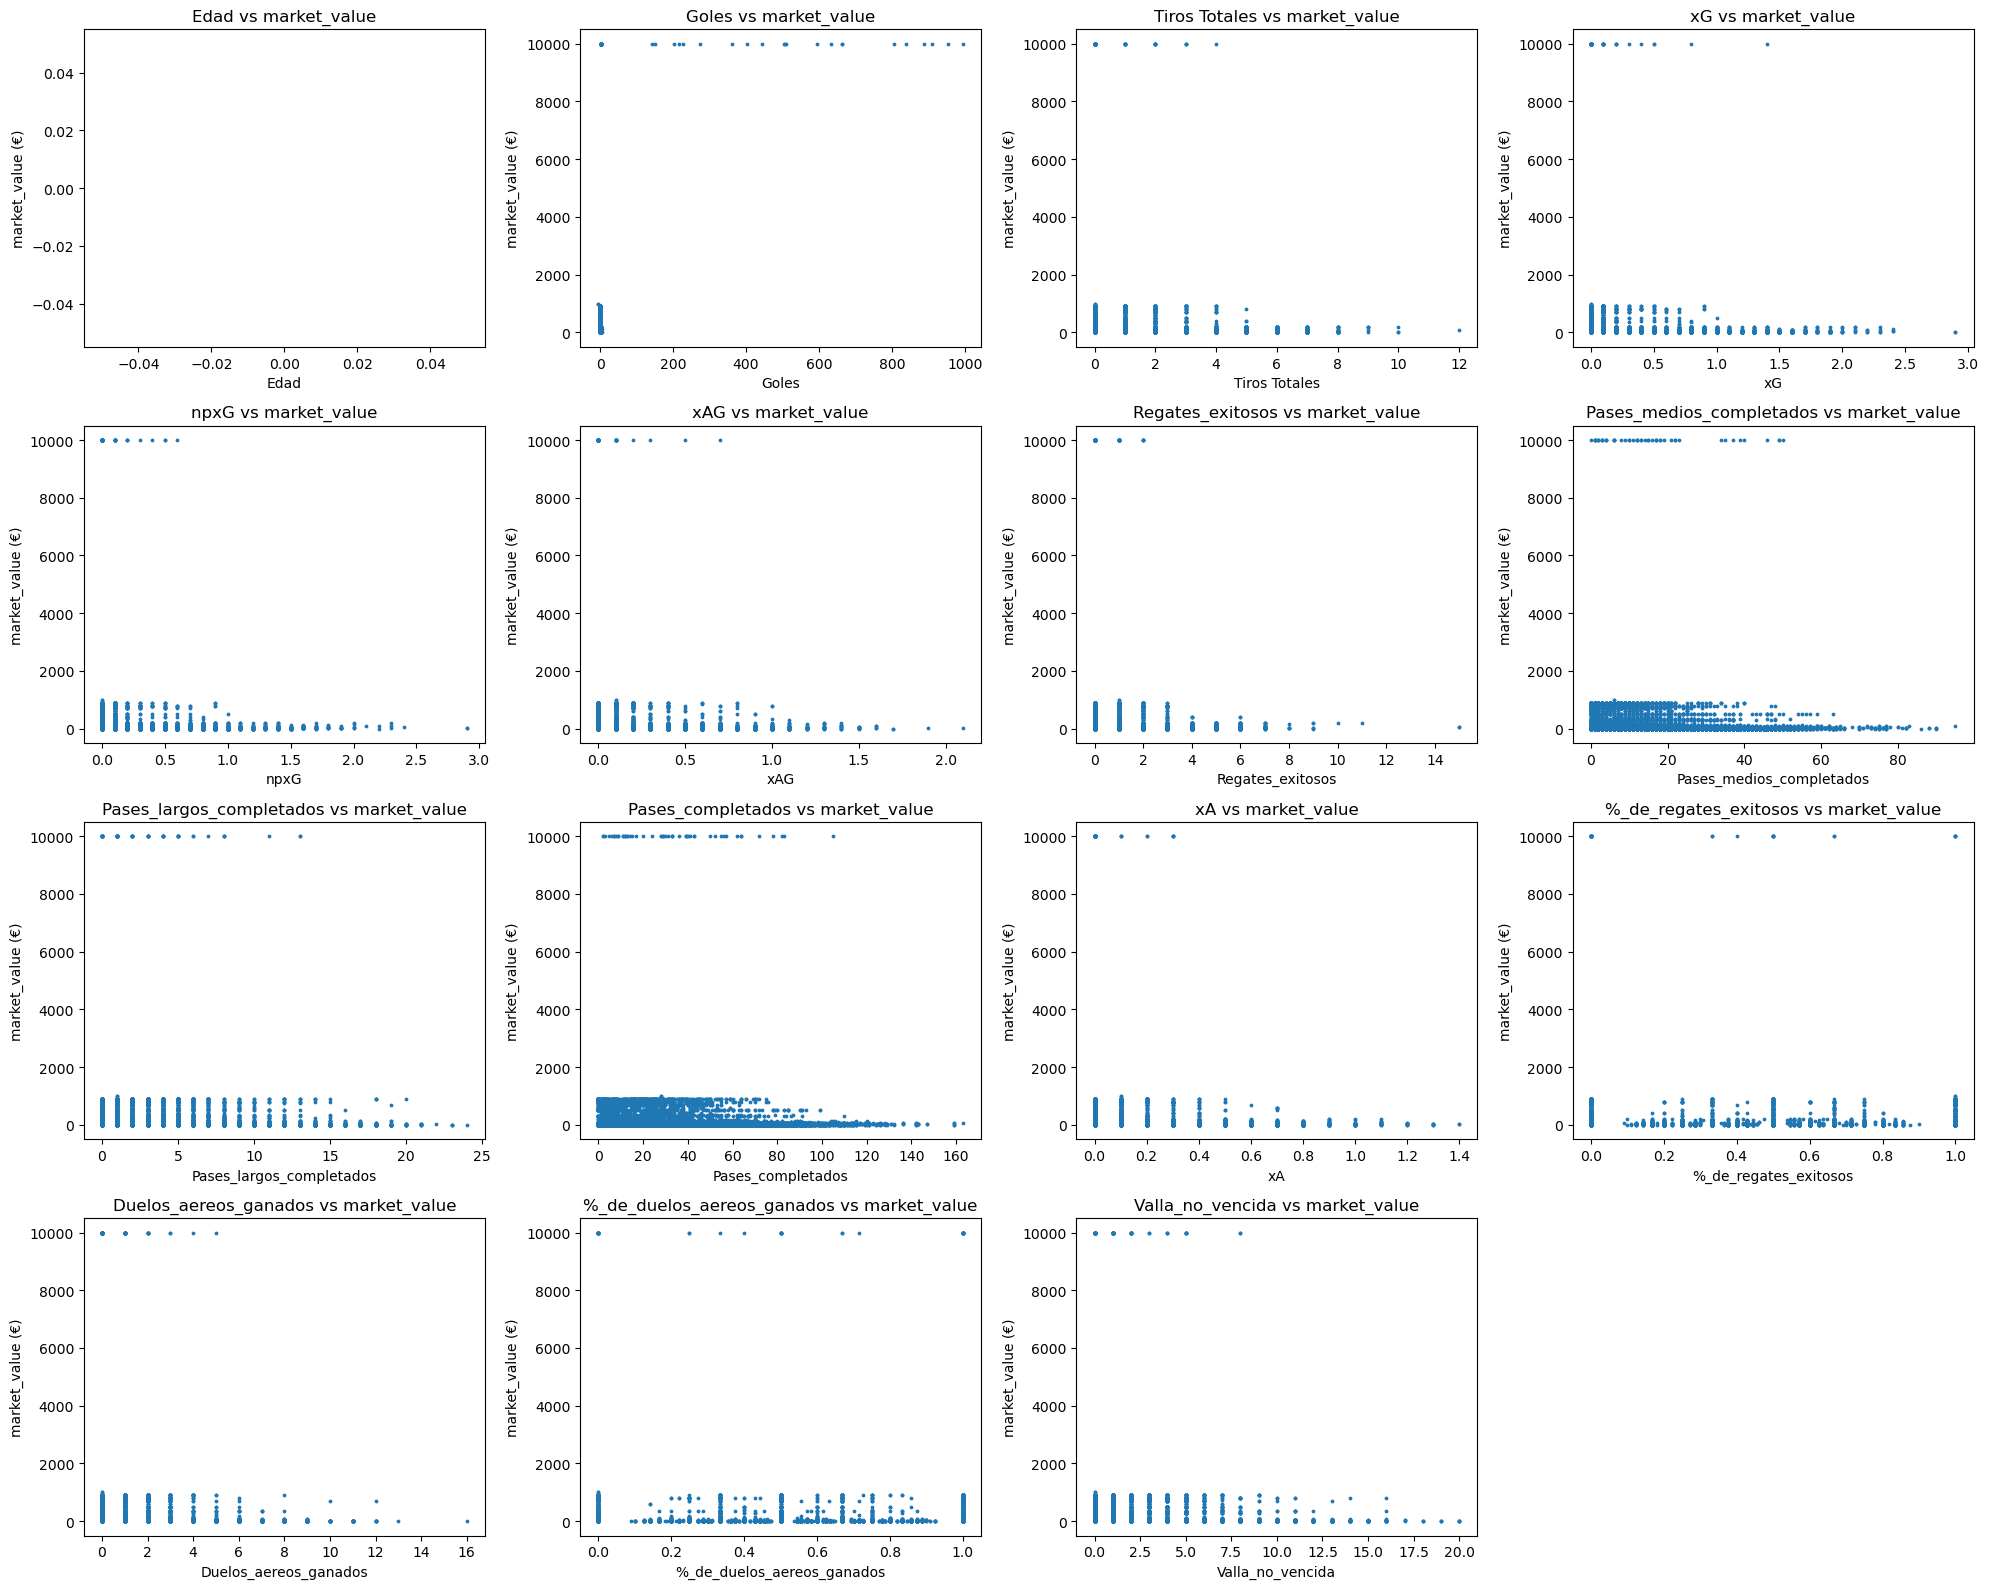

In [130]:
import numpy as np
import pandas as pd
#Revisa las columnas duplicadas como xAG y solo usa una
df = df.loc[:, ~df.columns.duplicated()].copy()

numericas = [
    'Edad', 'Goles', 'Tiros Totales', 'xG', 'npxG', 'xAG',
    'Regates_exitosos', 'Pases_medios_completados', 'Pases_largos_completados',
    'Pases_completados', 'xA', '%_de_regates_exitosos',
    'Duelos_aereos_ganados', '%_de_duelos_aereos_ganados',
    'market_value', 'Valla_no_vencida'
]


numericas = [c for c in numericas if c in df.columns]

def to_numeric_series(s: pd.Series) -> pd.Series:
    # pasa todo a string y limpia símbolos. Cambia coma decimal a punto.
    s = s.astype(str).str.replace(r'[^\d\-\.,]', '', regex=True).str.replace(',', '.', regex=False)
    return pd.to_numeric(s, errors='coerce')

for c in numericas:
    # si es una columna de porcentaje, se normaliza"
    if '%' in c or 'porcentaje' in c.lower():
        df[c] = to_numeric_series(df[c]) / 100.0
    else:
        df[c] = to_numeric_series(df[c])


def parse_value(x):
    if pd.isna(x) or x in ["-", "0", 0]: return np.nan
    x = str(x).replace("€","").replace(",","").strip()
    if x.endswith("m"): return float(x[:-1]) * 1_000_000
    if x.endswith("k"): return float(x[:-1]) * 1_000
    try: return float(x)
    except: return np.nan
#limpiar los valores del market_value
if 'market_value' in numericas:
    df['market_value'] = df['market_value'].apply(parse_value)

# filtra las que son numéricas después de la conversión
num_ok = [c for c in numericas if pd.api.types.is_numeric_dtype(df[c])]
print("Columnas numéricas válidas para graficar:", num_ok)

import matplotlib.pyplot as plt
import math

cols = num_ok
cols_por_fila = 4
filas = math.ceil(len(cols) / cols_por_fila)

fig, axes = plt.subplots(filas, cols_por_fila, figsize=(cols_por_fila*5, filas*4))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    ax.hist(df[col].dropna(), bins=30)
    ax.set_title(f"Histograma: {col}")
    ax.set_xlabel(col); ax.set_ylabel("Frecuencia")

for ax in axes[len(cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(filas, cols_por_fila, figsize=(cols_por_fila*5, filas*4))
axes = axes.flatten()

x = np.arange(len(df))
for ax, col in zip(axes, cols):
    y = df[col].astype(float).values
    ax.scatter(x, y, s=3)
    ax.set_title(f"Dispersión (índice): {col}")
    ax.set_xlabel("Índice"); ax.set_ylabel(col)

for ax in axes[len(cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

if 'market_value' in df.columns:
    target = df['market_value'].astype(float)
    cols_sin_target = [c for c in cols if c != 'market_value']

    filas = math.ceil(len(cols_sin_target) / cols_por_fila)
    fig, axes = plt.subplots(filas, cols_por_fila, figsize=(cols_por_fila*5, filas*4))
    axes = axes.flatten()

    for ax, col in zip(axes, cols_sin_target):
        ax.scatter(df[col], target, s=3)
        ax.set_title(f"{col} vs market_value")
        ax.set_xlabel(col); ax.set_ylabel("market_value (€)")

    for ax in axes[len(cols_sin_target):]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()


##### 2.1.3.1 Conculsiones iniciales sobre las variables numericas
Inicialmente, algunas de las variables muestran cantidades significativas de valores anómalos a simple vista. Se pueden apreciar estas anomalías en variables goles, donde los valores son demasiado altos y la edad no muestra ningún valor. Ademas, la variable market value presenta valores altisimos. 
Al final, se hicieron graficas donde se contrastan las variables con el market value, es ahi donde los datos pierden sentido.

#### 2.1.4 Análisis Categórico 

En esta sección se llevará a cabo el análisis categórico utilizando boxplots. Se busca visualizar la distribución de las variables categóricas y detectar posibles outliers o patrones particulares en los grupos. Esto permitirá identificar discrepancias, validar la consistencia de la información y determinar si es necesario realizar alguna transformación o limpieza de los datos antes de continuar con el análisis o modelado.


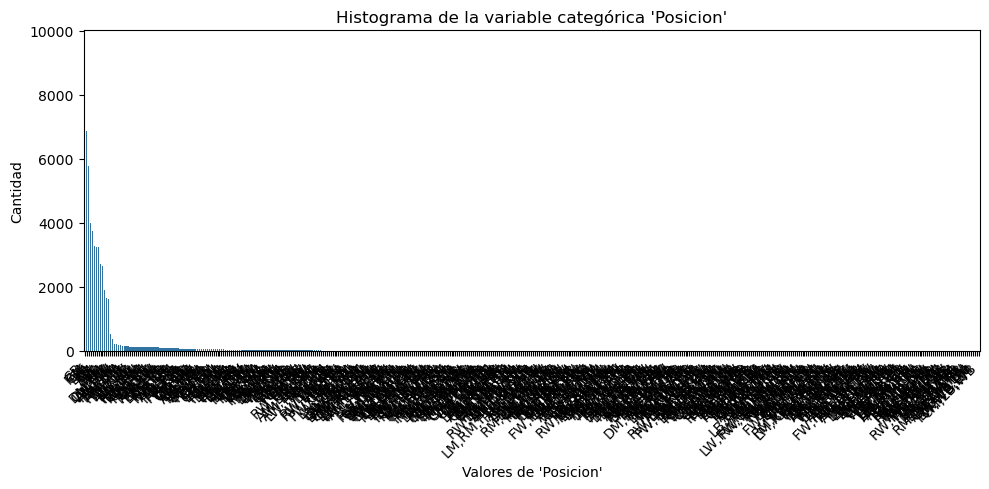

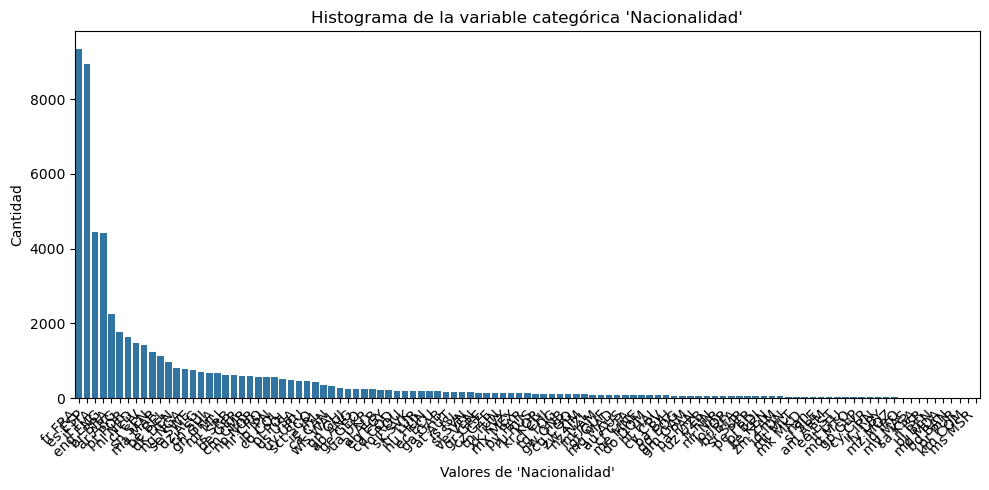

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_count(df, col, top_n=20, order_by_freq=True):
    if col not in df.columns:
        print(f" La columna '{col}' no existe.")
        return
    s = df[col].astype(str).fillna("Desconocido")
    vc = s.value_counts()
    if top_n:
        vc = vc.head(top_n)
    order = vc.index if order_by_freq else None

    plt.figure(figsize=(10,5))
    sns.countplot(x=s[s.isin(vc.index)], order=order)
    plt.title(f"Histograma de la variable categórica '{col}'")
    plt.xlabel(f"Valores de '{col}'")
    plt.ylabel("Cantidad")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


plot_count(df, "Posicion", top_n=None)        
plot_count(df, "Nacionalidad", top_n=None)      


Como podemos observar en el histograma generado, las posiciones y nacionalidad de los jugadores tienen demasiadas categorias, lo cual dificulta su visualización. Se tomo la desicion de separar las etiquetas de las posiciones y agrupar a las nacionalidades por continente.

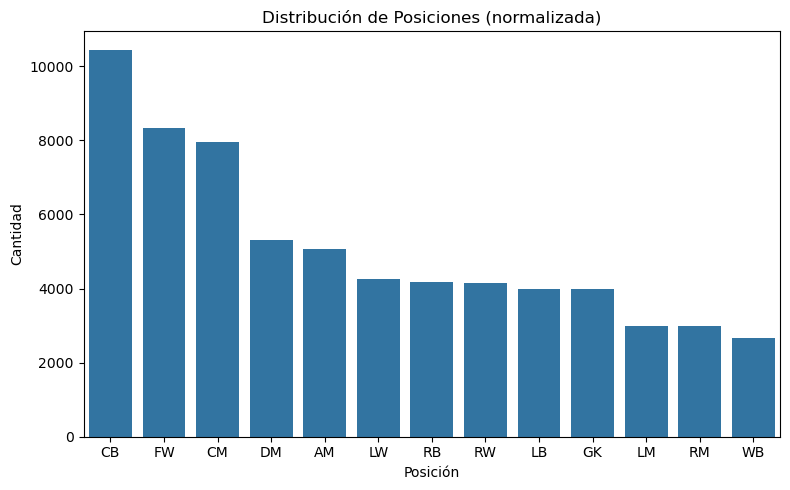

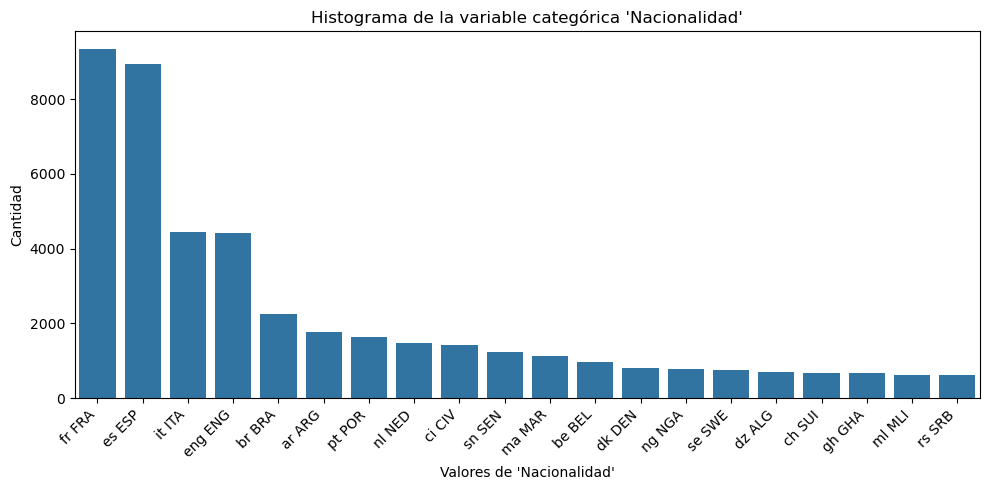

In [132]:
# Normalizar Posicion multi-etiqueta ("FW,AM" a dos filas FW y AM)
if "Posicion" in df.columns:
    pos_norm = (
        df["Posicion"]
        .astype(str).str.split(",")        # separa por coma
        .explode().str.strip()             # una fila por posición
        .replace({"": "Desconocido"})
    )
    plt.figure(figsize=(8,5))
    sns.countplot(x=pos_norm, order=pos_norm.value_counts().index)
    plt.title("Distribución de Posiciones (normalizada)")
    plt.xlabel("Posición"); plt.ylabel("Cantidad")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    #top de paises
    plot_count(df, "Nacionalidad", top_n=20)  


Paises no ubicados:
 pais_iso3
GUI    257
KVX    137
TOG    115
CGO    102
ZIM     99
GUF     90
MAD     86
CTA     80
HAI     74
CPV     73
EQG     70
GAM     63
UZB     59
FIN     56
SUR     47
BDI     46
ZAM     44
MLT     34
EST     31
MTQ     30
LTU     30
GLP     28
CYP     27
LBY     20
MOZ     19
MAS     10
ISR      8
MDA      5
BAN      4
PUR      2
Name: count, dtype: int64


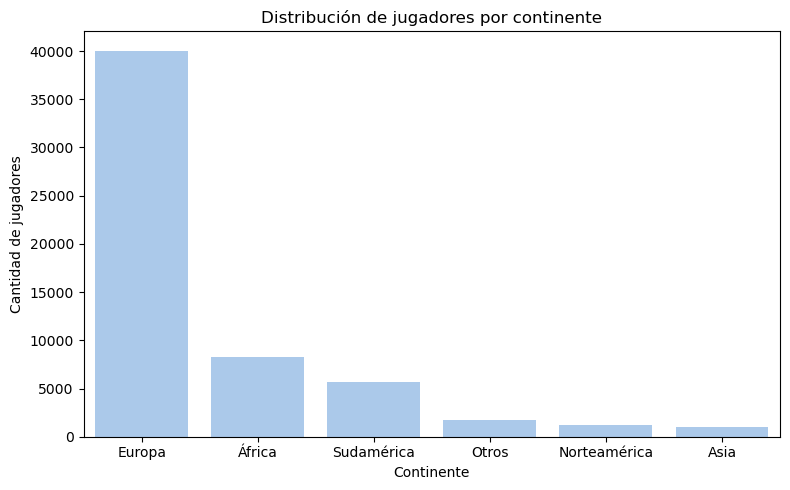

In [133]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def extract_iso3(x):
    if pd.isna(x):
        return None
    s = str(x).strip()
    
    m = re.search(r'([A-Za-z]{3})$', s)
    return m.group(1).upper() if m else s.split()[-1].upper()

df["pais_iso3"] = df["Nacionalidad"].apply(extract_iso3)


continent_map = {
    # Europa
    "ENG":"Europa","SCO":"Europa","WAL":"Europa","NIR":"Europa","IRL":"Europa",
    "ESP":"Europa","FRA":"Europa","GER":"Europa","ITA":"Europa","POR":"Europa",
    "NED":"Europa","BEL":"Europa","SUI":"Europa","SWE":"Europa","NOR":"Europa",
    "DEN":"Europa","ISL":"Europa","POL":"Europa","CRO":"Europa","SRB":"Europa",
    "BUL":"Europa","ROU":"Europa","GRE":"Europa","CZE":"Europa","SVK":"Europa",
    "AUT":"Europa","HUN":"Europa","UKR":"Europa","RUS":"Europa","TUR":"Europa",
    "SVN":"Europa","BIH":"Europa","ALB":"Europa","MNE":"Europa","MKD":"Europa",
    "ARM":"Europa","GEO":"Europa","AZE":"Europa",
    # Sudamérica
    "BRA":"Sudamérica","ARG":"Sudamérica","URU":"Sudamérica","COL":"Sudamérica",
    "CHI":"Sudamérica","PAR":"Sudamérica","ECU":"Sudamérica","PER":"Sudamérica",
    "VEN":"Sudamérica","BOL":"Sudamérica",
    # Norteamérica / CONCACAF
    "USA":"Norteamérica","MEX":"Norteamérica","CAN":"Norteamérica","CRC":"Norteamérica",
    "HON":"Norteamérica","JAM":"Norteamérica","PAN":"Norteamérica","GUA":"Norteamérica",
    "SLV":"Norteamérica","TRI":"Norteamérica","CUB":"Norteamérica","DOM":"Norteamérica",
    # África
    "CIV":"África","NGA":"África","CMR":"África","SEN":"África","EGY":"África",
    "MAR":"África","GHA":"África","ALG":"África","ZAF":"África","TUN":"África",
    "MLI":"África","BFA":"África","BEN":"África","TGO":"África","NER":"África",
    "COD":"África","CAF":"África","COG":"África","SLE":"África","LBR":"África",
    "GNB":"África","GAB":"África","UGA":"África","KEN":"África","TZA":"África",
    "ZMB":"África","ZWE":"África","RWA":"África","ETH":"África","ANG":"África",
    # Asia / Oceanía
    "JPN":"Asia","KOR":"Asia","CHN":"Asia","QAT":"Asia","IRN":"Asia","IRQ":"Asia",
    "UAE":"Asia","KSA":"Asia","JOR":"Asia","LBN":"Asia","OMN":"Asia","BHR":"Asia",
    "KUW":"Asia","IND":"Asia","THA":"Asia","VNM":"Asia","IDN":"Asia","MYS":"Asia",
    "PHI":"Asia","SGP":"Asia","AUS":"Asia","NZL":"Asia"
}

df["Region"] = df["pais_iso3"].map(continent_map).fillna("Otros")

# Paises desconocidos para ubicar despues
unknown = df.loc[df["Region"]=="Otros","pais_iso3"].value_counts().head(30)
print("Paises no ubicados:\n", unknown)


plt.figure(figsize=(8,5))
sns.countplot(x="Region", data=df,
              order=df["Region"].value_counts().index,
              color=sns.color_palette("pastel")[0])
plt.title("Distribución de jugadores por continente")
plt.xlabel("Continente"); plt.ylabel("Cantidad de jugadores")
plt.tight_layout(); plt.show()




#### 2.1.4.1 Conclusión del análisis de variables categóricas

El análisis exploratorio de las variables categóricas mostró que tanto Posicion como Nacionalidad presentan problemas de alta cardinalidad: en el primer caso, existe una fuerte fragmentación debido a que muchos jugadores aparecen con múltiples posiciones en un mismo registro, como “FW,AM”, lo que genera combinaciones únicas y dificulta su uso directo en modelos de regresión, mientras que en el segundo caso se identificaron decenas de países con muy pocos jugadores y solo unos pocos (ENG, BRA, ESP, FRA) concentran la mayoría de registros, lo que puede afectar negativamente al modelo al generar demasiadas variables dummy poco informativas. Para mejorar la utilidad de estas variables se recomienda normalizar Posicion, separándola en categorías individuales y/o agrupándola en roles como Portero, Defensa, Mediocampista y Delantero, y simplificar Nacionalidad considerando únicamente los países más frecuentes y agrupando el resto en una categoría “Otros” o bien por regiones/continentes, con lo cual se logra mayor claridad en el análisis.

# 2.2 Perfilamiento
En esta sección se utilizará pandas_profiling para generar un informe detallado del dataset. El reporte incluirá análisis estadísticos exploratorios como la distribución de las variables, la identificación de valores nulos, la detección de posibles outliers y la evaluación de la correlación entre las variables. Esto permitirá obtener una visión aún más especifica de la calidad y estructura de los datos que a lo mejor no se alcanza a visualizar con solo gráficas tradicionales.

In [ ]:
#from ydata_profiling import ProfileReport
# Perfilamiento de los datos a través de ydata_profiling
#df = pd.read_csv("datos_entrenamiento_laboratorio1(train_data).csv")
#profile = ProfileReport(df, title='futAlpes Data - Profiling Report', explorative=True)
#vollver html para explorar mejor
#profile.to_file("eda_futalpes.html")

#### 2.2.1 Análisis del perfilamiento
##### 2.2.1.1 Alertas encontradas por el programa
Se obtuvieron 84 alertas. En estas, se destacan estos aspectos importantes.
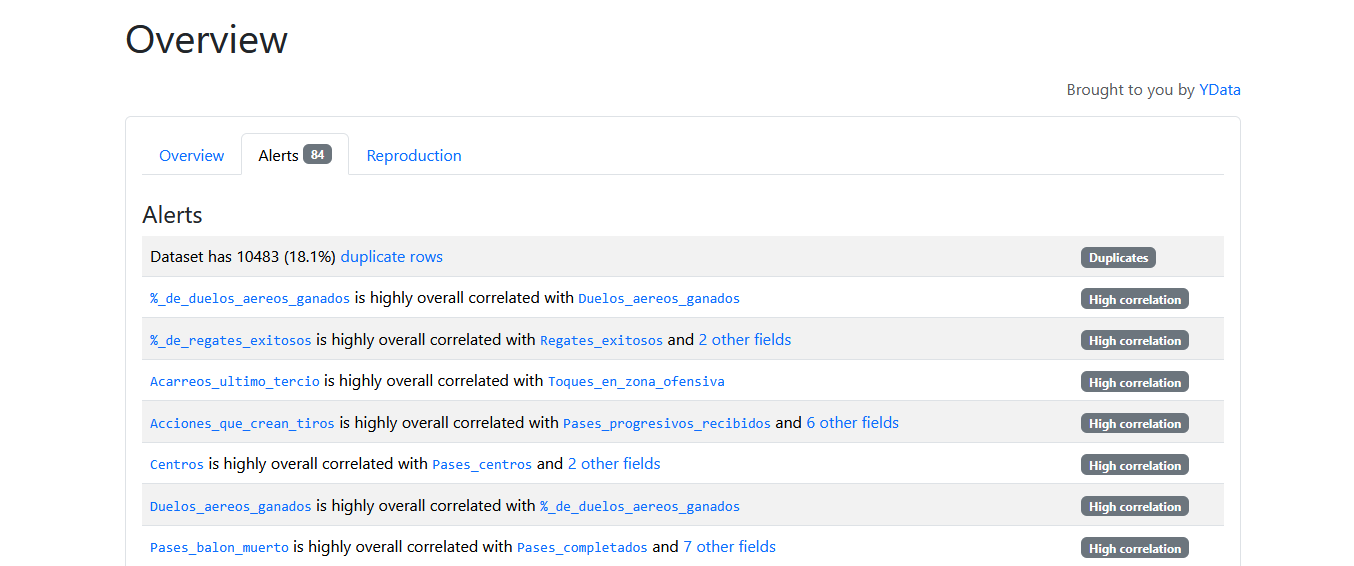
1. **Filas Duplicadas**
    - **Problema:** Hay 10483 filas duplicadas en el conjunto de datos.

    - **Acción:** Se tomará la acción de eliminar estos duplicados para asegurar la integridad del análisis y evitar sesgos en los modelos de aprendizaje automático.

In [134]:
# Mostrar todas las filas duplicadas en el DataFrame
filas_duplicadas = df[df.duplicated(keep=False)]
print(filas_duplicadas)

# Contar la cantidad de filas duplicadas (considerando solo la primera aparición como no duplicada)
cantidad_duplicados = df.duplicated().sum()
print("\n----------------------------------------------------")
print(f"Cantidad de filas duplicadas: {cantidad_duplicados}")
print("------------------------------------------------------")

                  Jugador Nacionalidad Posicion  Edad  \
0         Bruno Fernandes       pt POR    FW,AM   NaN   
1         Marcus Rashford      eng ENG       LW   NaN   
2             Amad Diallo       ci CIV       RW   NaN   
3             Amad Diallo       ci CIV       RW   NaN   
4      Alejandro Garnacho       ar ARG       RW   NaN   
...                   ...          ...      ...   ...   
57929    Chiedozie Ogbene       ie IRL       RW   NaN   
57930       Conor Chaplin      eng ENG    AM,RW   NaN   
57931    Omari Hutchinson      eng ENG    AM,RW   NaN   
57932     Kalvin Phillips      eng ENG       DM   NaN   
57933        Jens Cajuste       se SWE       DM   NaN   

                    Dia_partido  Goles  Tiros Totales   xG  npxG  xAG  xAG.1  \
0        Friday August 16, 2024      0              6  1.2   1.2  0.0    0.0   
1        Friday August 16, 2024      0              0  0.0   0.0  0.7    0.7   
2        Friday August 16, 2024      0              0  0.0   0.0  0.1    0.

2. **Correlación**
- **Problema:** hay mucha correlacion entre los datos de pases y duelos, s eparecen mucho sus valores
- **Acción:** conservar solo una variable representativa de cada grupo.

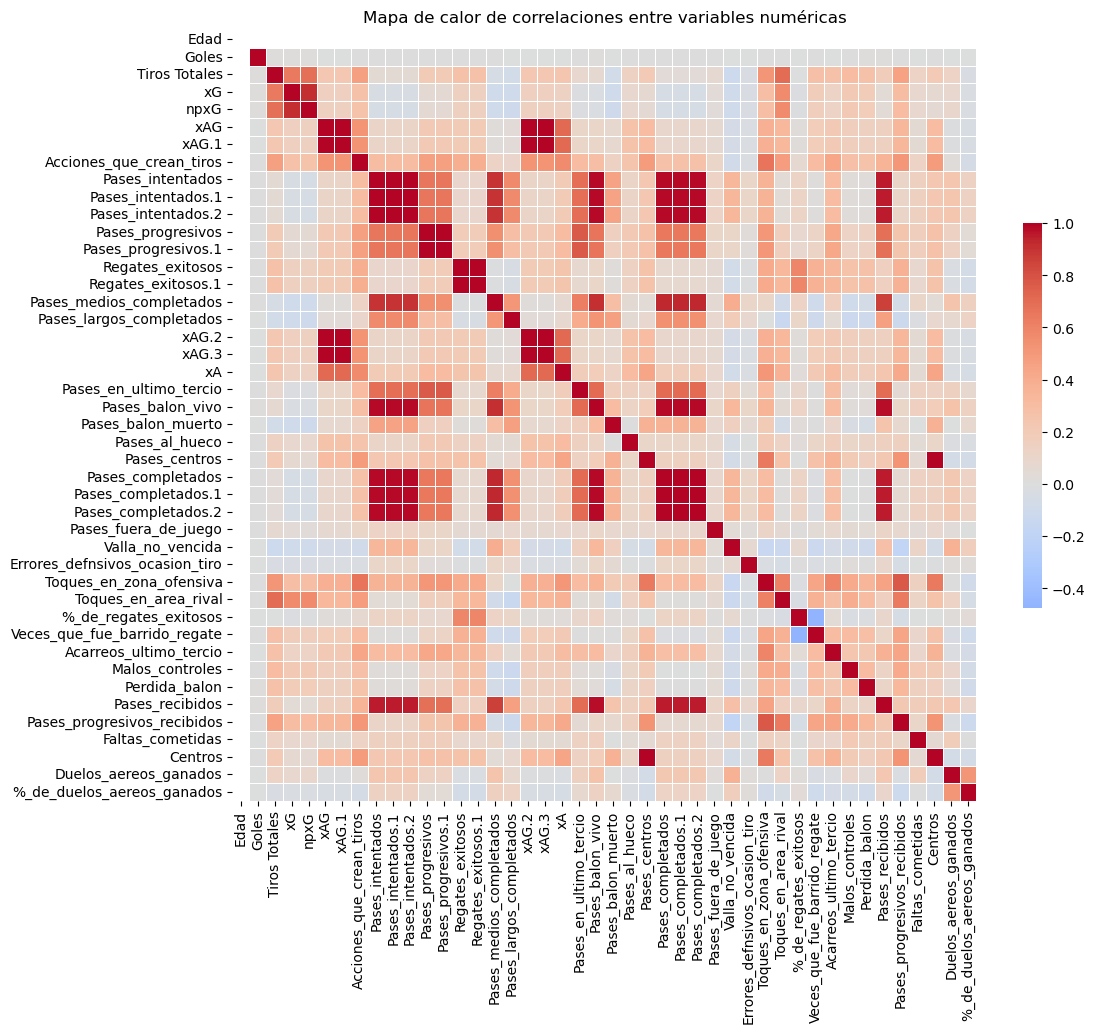

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas (excluye el target si quieres)
num_cols = df.select_dtypes(include="number").columns
# Si quieres excluir el target:
num_cols = [c for c in num_cols if c != "market_value"]

# Matriz de correlaciones (Pearson por defecto, puedes probar Spearman también)
corr = df[num_cols].corr(method="pearson")

# Plot
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False, fmt=".2f", 
            linewidths=0.5, cbar_kws={"shrink": .5})
plt.title("Mapa de calor de correlaciones entre variables numéricas")
plt.show()


In [136]:
# correlaciones altas
threshold = 0.8
corr_pairs = corr.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[(corr_pairs < 0.999) & (corr_pairs > threshold)]
print("Pares de variables con correlación > 0.8:\n", corr_pairs)


Pares de variables con correlación > 0.8:
 Pases_intentados.2        Pases_balon_vivo            0.987687
Pases_balon_vivo          Pases_intentados.2          0.987687
                          Pases_intentados            0.987687
                          Pases_intentados.1          0.987687
Pases_intentados          Pases_balon_vivo            0.987687
                                                        ...   
Pases_intentados.2        Pases_medios_completados    0.899995
Pases_medios_completados  Pases_intentados.2          0.899995
Pases_intentados.1        Pases_medios_completados    0.899995
Pases_medios_completados  Pases_recibidos             0.865105
Pases_recibidos           Pases_medios_completados    0.865105
Length: 62, dtype: float64


El mapa de calor evidencia que varias métricas presentan correlaciones muy altas, como `xG` con `Tiros Totales`, `Regates_exitosos` con `%_de_regates_exitosos`, y diferentes tipos de `Pases_*` entre sí.  
Esto confirma la necesidad de reducir la multicolinealidad, seleccionando una variable representativa por grupo, lo cual simplifica el modelo y mejora la estabilidad de las estimaciones.


3. **Desbalance**
- **Problema:** Las variables Pases_fuera_de_juego y Errores_defnsivos_ocasion_tiro estan desbalanceadas 77.8% y 87.4% respectivamente.
- **Acción:** retirar registros
   



In [137]:
tabla_pases = df['Pases_fuera_de_juego'].value_counts().reset_index()
tabla_pases.columns = ['Valor de pases', 'Conteo']
tabla_pases



,Valor de pases,Conteo
0,0,52154
1,1,5258
2,2,472
3,3,49
4,5,1


In [138]:
tabla_errores = df['Errores_defnsivos_ocasion_tiro'].value_counts().reset_index()
tabla_errores.columns = ['Valor de errores', 'Conteo']
tabla_errores

,Valor de errores,Conteo
0,0,55625
1,1,2216
2,2,90
3,3,3


### 2.3 Análisis de Calidad

En esta sección se evalúa la calidad de los datos del conjunto utilizado para el laboratorio de regresión de FutAlpes F.C., considerando los principales aspectos.

El análisis de calidad permitió detectar y documentar problemas de completitud, unicidad, consistencia y validez en el dataset. Como acciones correctivas, se recomienda: eliminar duplicados, descartar columnas con demasiados nulos o poco aporte, imputar valores faltantes en variables clave, transformar variables textuales a numéricas, y simplificar las variables categóricas de alta cardinalidad (Posición y Nacionalidad). Con estas medidas, los datos quedan listos para su uso en la construcción y evaluación del modelo de regresión.


#### 2.3.1 Análisis de Completitud

In [139]:
# Análisis de completitud: conteo y porcentaje de valores nulos en cada columna
faltantes = df.isnull().sum()
porcentaje_faltante = 100 * df.isnull().sum() / len(df)
completitud = pd.DataFrame({
    "Valores faltantes": faltantes,
    "Porcentaje (%)": porcentaje_faltante
})
print(completitud)

                            Valores faltantes  Porcentaje (%)
Jugador                                     0        0.000000
Nacionalidad                               32        0.055235
Posicion                                    0        0.000000
Edad                                    57934      100.000000
Dia_partido                                 0        0.000000
...                                       ...             ...
%_de_duelos_aereos_ganados              20957       36.173922
market_value                            13094       22.601581
contract_date                           12916       22.294335
pais_iso3                                  32        0.055235
Region                                      0        0.000000

[52 rows x 2 columns]


El dataset presenta problemas de completitud en varias variables. La variable objetivo market_value tiene aproximadamente un 22% de valores nulos, lo que implica que esos registros no pueden usarse para entrenamiento. Además, variables como %_de_regates_exitosos (≈50% de nulos), %_de_duelos_aereos_ganados (≈36%) y contract_date (≈22%) muestran una falta de información significativa. Esto obliga a descartar algunas columnas o aplicar estrategias de imputación específicas.

#### 2.3.2 Análisis de Unicidad

In [140]:
# Análisis de unicidad en español

# Número total de filas
total_filas = df.shape[0]
print("Número total de filas:", total_filas)

# Número de filas duplicadas
filas_duplicadas = df.duplicated().sum()
print("Número de filas duplicadas:", filas_duplicadas)
print(f"Porcentaje de filas duplicadas: {100 * filas_duplicadas / total_filas:.2f}%")

# Análisis de unicidad por columna: número de valores únicos en cada una
print("\nNúmero de valores únicos por columna:")
unicidad = df.nunique()
print(unicidad)

Número total de filas: 57934
Número de filas duplicadas: 10483
Porcentaje de filas duplicadas: 18.09%

Número de valores únicos por columna:
Jugador                       2242
Nacionalidad                   110
Posicion                       452
Edad                             0
Dia_partido                    198
                              ... 
%_de_duelos_aereos_ganados      79
market_value                    89
contract_date                   11
pais_iso3                      110
Region                           6
Length: 52, dtype: int64


Se identificó que alrededor del 18% de los registros son duplicados. Mantenerlos introduciría sesgo y redundancia, por lo que se deben eliminar mediante técnicas de depuración (drop_duplicates), asegurando que cada jugador tenga un registro único y representativo.

2.3.3 Análisis de Consistencia

In [143]:
valores_pos = df["Posicion"].astype(str).unique()
print("Valores únicos en 'Posicion':", valores_pos[:30])  # mostramos los primeros 30

# Set esperado de posiciones estándar (ejemplo, lo puedes ampliar según tu dataset)
pos_esperadas = {"GK","DF","MF","FW","ST","LW","RW","AM","CM","DM","CB","LB","RB"}

inconsistentes_pos = [val for val in valores_pos if not all(p.strip() in pos_esperadas for p in str(val).split(","))]

if not inconsistentes_pos:
    print("La columna 'Posicion' es consistente (solo contiene categorías esperadas).")
else:
    print("Atención: 'Posicion' contiene valores no esperados:", inconsistentes_pos[:20])


Valores únicos en 'Posicion': ['FW,AM' 'LW' 'RW' 'AM' 'FW' 'DM' 'LB,RB' 'CB,LB' 'CB' 'RB' 'GK' 'DM,AM'
 'AM,DM' 'LB' 'LW,RW' 'RB,RW' 'LM' 'CM' 'RM' 'CM,CB' 'WB' 'LW,RB,RW'
 'RW,RB' 'LW,AM' 'LW,RW,FW' 'FW,LW' 'LW,FW' 'FW,LM' 'LW,LM' 'RW,RM,FW,LM']
Atención: 'Posicion' contiene valores no esperados: ['LM', 'RM', 'WB', 'FW,LM', 'LW,LM', 'RW,RM,FW,LM', 'LM,WB,RM', 'CM,LM', 'LB,WB', 'LW,LM,FW', 'RM,CM', 'AM,LM', 'WB,LB', 'WB,RB', 'WB,RW', 'WB,LM', 'CM,RM', 'WB,CB,RB', 'RW,LM', 'RM,FW']


In [144]:
valores_nat = df["Nacionalidad"].astype(str).unique()
print("Ejemplos de nacionalidades:", valores_nat[:30])

# Regla: longitud mínima de 3 letras (puede venir en formato raro → lo marcamos)
inconsistentes_nat = [val for val in valores_nat if len(val.strip().split()[-1]) != 3]

if not inconsistentes_nat:
    print("La columna 'Nacionalidad' es consistente (códigos ISO-3).")
else:
    print("Atención: 'Nacionalidad' contiene valores no estándar:", inconsistentes_nat[:20])


Ejemplos de nacionalidades: ['pt POR' 'eng ENG' 'ci CIV' 'ar ARG' 'nl NED' 'sct SCO' 'br BRA'
 'nir NIR' 'ma MAR' 'cm CMR' 'mx MEX' 'ng NGA' 'es ESP' 'wls WAL' 'rs SRB'
 'us USA' 'fr FRA' 'de GER' 'iq IRQ' 'au AUS' 'ie IRL' 'eg EGY' 'cd COD'
 'co COL' 'hu HUN' 'gr GRE' 'se SWE' 'ch SUI' 'cl CHI' 'jp JPN']
La columna 'Nacionalidad' es consistente (códigos ISO-3).


In [145]:
for col in ["%_de_regates_exitosos","%_de_duelos_aereos_ganados"]:
    if col in df.columns:
        col_min, col_max = df[col].min(), df[col].max()
        print(f"Rango de {col}: {col_min} - {col_max}")
        if col_min < 0 or col_max > 100:
            print(f"⚠ Atención: {col} tiene valores fuera del rango [0,100]")
        else:
            print(f"✔ {col} es consistente (en [0,100])")


Rango de %_de_regates_exitosos: 0.0 - 1.0
✔ %_de_regates_exitosos es consistente (en [0,100])
Rango de %_de_duelos_aereos_ganados: 0.0 - 1.0
✔ %_de_duelos_aereos_ganados es consistente (en [0,100])


In [146]:
edad_min, edad_max = df["Edad"].min(), df["Edad"].max()
print(f"Rango de Edad: {edad_min} - {edad_max}")
if edad_min < 15 or edad_max > 45:
    print("⚠ Atención: 'Edad' tiene valores fuera del rango típico de jugadores profesionales [15,45]")
else:
    print("✔ 'Edad' es consistente")


Rango de Edad: nan - nan
✔ 'Edad' es consistente


In [147]:
mv_min, mv_max = df["market_value"].min(), df["market_value"].max()
print(f"Rango de market_value: {mv_min} - {mv_max}")
if mv_min <= 0:
    print("⚠ Atención: 'market_value' contiene valores no válidos (<=0).")
else:
    print("✔ 'market_value' es consistente (positivo)")


Rango de market_value: 1.0 - 9999.99
✔ 'market_value' es consistente (positivo)


Existen discrepancias en algunas variables categóricas como Posicion, donde aparecen múltiples posiciones en un mismo registro (ejemplo: “FW,AM”), lo cual incrementa artificialmente la cardinalidad y dificulta el análisis. Del mismo modo, la variable Nacionalidad incluye decenas de países con baja frecuencia. En variables numéricas, se evidencian valores extremos y distribuciones muy sesgadas, como en Goles, xG o xA, donde la mayoría de jugadores tienen 0 y unos pocos concentran los valores más altos. Estas inconsistencias no necesariamente son errores, pero sí requieren transformaciones o agrupaciones para su correcto uso en el modelo.

#### 2.3.4 Análisis de Validez

 Algunos campos no cumplen con los formatos esperados: `market_value` se encontraba originalmente en formato de texto con símbolos monetarios (ej. “€50.00m”, “€200k”), lo cual requería transformación a valores numéricos en euros. Asimismo, los porcentajes (`%_de_regates_exitosos`, `%_de_duelos_aereos_ganados`) necesitan normalización a escala numérica [0,1]. Tambien es importnate resaltar que la columna Edad no está guardada como un número, sino como una cadena tipo "29-343", "22-036", etc. Por eso, cuando se intneto calcular el rango (min / max) salio nan-nan. Y los goles no son una variable valida porque tienen valores negativos. 

In [149]:
print("Análisis de validez:")

# 1. Validación de Edad
edad_min, edad_max = df["Edad"].min(), df["Edad"].max()
print("\nRango de 'Edad':", edad_min, "-", edad_max)
if (df["Edad"] < 15).any() or (df["Edad"] > 45).any():
    print("Error: 'Edad' contiene valores fuera del rango esperado [15,45].")
else:
    print("La columna 'Edad' es válida.")

# 2. Validación de market_value (debe ser >0)
mv_min, mv_max = df["market_value"].min(), df["market_value"].max()
print("\nRango de 'market_value':", mv_min, "-", mv_max)
if (df["market_value"] <= 0).any():
    print("Error: 'market_value' contiene valores <= 0.")
else:
    print("La columna 'market_value' es válida.")

# 3. Validación de porcentajes (%_de_regates_exitosos, %_de_duelos_aereos_ganados)
for col in ["%_de_regates_exitosos", "%_de_duelos_aereos_ganados"]:
    if col in df.columns:
        col_min, col_max = df[col].min(), df[col].max()
        print(f"\nRango de '{col}': {col_min} - {col_max}")
        if (df[col] < 0).any() or (df[col] > 100).any():
            print(f"Error: '{col}' contiene valores fuera del rango [0,100].")
        else:
            print(f"La columna '{col}' es válida.")

# 4. Validación de variables de conteo (no negativas)
conteos = ["Goles", "Tiros Totales", "Regates_exitosos", "Pases_completados"]
for col in conteos:
    if col in df.columns:
        col_min, col_max = df[col].min(), df[col].max()
        print(f"\nRango de '{col}': {col_min} - {col_max}")
        if (df[col] < 0).any():
            print(f"Error: '{col}' contiene valores negativos.")
        else:
            print(f"La columna '{col}' es válida (no hay negativos).")


Análisis de validez:

Rango de 'Edad': nan - nan
La columna 'Edad' es válida.

Rango de 'market_value': 1.0 - 9999.99
La columna 'market_value' es válida.

Rango de '%_de_regates_exitosos': 0.0 - 1.0
La columna '%_de_regates_exitosos' es válida.

Rango de '%_de_duelos_aereos_ganados': 0.0 - 1.0
La columna '%_de_duelos_aereos_ganados' es válida.

Rango de 'Goles': -5 - 995
Error: 'Goles' contiene valores negativos.

Rango de 'Tiros Totales': 0 - 12
La columna 'Tiros Totales' es válida (no hay negativos).

Rango de 'Regates_exitosos': 0 - 15
La columna 'Regates_exitosos' es válida (no hay negativos).

Rango de 'Pases_completados': 0 - 163
La columna 'Pases_completados' es válida (no hay negativos).


## 3. Preparación de los Datos

En esta etapa se busca limpiar y transformar el dataset para asegurar que la información sea confiable y esté lista para el modelado. Las principales acciones son:

- Verificar y eliminar valores nulos, en caso de existir.
- Detectar y remover filas duplicadas.
- Identificar y tratar valores atípicos u outliers en variables numéricas revisadas en los diagramas de dispersión e histogramas.
- Revisar la consistencia de los datos, especialmente en variables categóricas.
- Evaluar las constantes y alta correlación entre algunas variables para determinar cuáles se mantendrán o se agruparán en procesos de selección de características.

Estos pasos asegurarán la calidad del dataset, eliminando ruidos y errores que puedan afectar el análisis y el rendimiento del modelo.

In [150]:
import pandas as pd, numpy as np, re

# === Cargar datos desde cero ===
df_raw = pd.read_csv("datos_entrenamiento_laboratorio1(train_data).csv")  
df = df_raw.copy()
print("Inicio:", df.shape)


def parse_market_value(x):
    if pd.isna(x) or x in ["-", "0", 0]: 
        return np.nan
    s = str(x).replace("€","").replace(",","").strip().lower()
    try:
        if s.endswith("m"): return float(s[:-1]) * 1_000_000
        if s.endswith("k"): return float(s[:-1]) * 1_000
        return float(s)
    except:
        return np.nan

def parse_edad(x):
    try:
        y, d = str(x).split("-")
        return int(y) + int(d)/365
    except:
        return np.nan

def extract_iso3(x):
    if pd.isna(x): return None
    s = str(x).strip()
    m = re.search(r'([A-Za-z]{3})$', s)
    return m.group(1).upper() if m else s.split()[-1].upper()

def parse_percent_to_float(s):
    if pd.isna(s): return np.nan
    s = str(s).strip().replace("%","").replace(",", ".")
    try:
        v = float(s)
        return v/100 if v>1 else v
    except:
        return np.nan

def chk(msg):
    print(f"{msg:>35} -> filas={df.shape[0]}")


Inicio: (57934, 50)


### 3.1 Eiminar valores nulos

In [151]:
cols_drop = [
    "contract_date",                    # ~22% nulos y poco poder
    "%_de_regates_exitosos",            # ~50% nulos + redundante con 'Regates_exitosos'
    "Pases_fuera_de_juego",             # casi todo ceros
    "Errores_defensivos_ocasion_tiro"   # casi todo ceros
]
df = df.drop(columns=[c for c in cols_drop if c in df.columns], errors="ignore")


### 3.2 Eliminar datos duplicados

In [152]:
# 1) Quitar duplicados de columnas y filas
df = df.loc[:, ~df.columns.duplicated()].copy()
df = df.drop_duplicates().copy()
chk("Tras eliminar duplicados")


           Tras eliminar duplicados -> filas=47431


### 3.3 Corrgeir variables clave: Edad, market_value y variables de porcentaje


In [153]:
# 2) Limpiar target market_value (NO filtres aún, primero mira cuántos válidos hay)
if "market_value" in df.columns:
    df["market_value"] = df["market_value"].apply(parse_market_value)

print("market_value no nulos:", df["market_value"].notna().sum(), "/", len(df))
print(df["market_value"].head(10))


market_value no nulos: 37214 / 47431
0    5.000000e+07
1    5.000000e+07
2             NaN
3    1.000000e+09
4    4.500000e+07
5    2.800000e+07
6    3.000000e+07
7    5.000000e+07
8    5.000000e+07
9    1.000000e+07
Name: market_value, dtype: float64


In [154]:
# 3) SOLO si hay suficientes valores válidos, filtra para entrenamiento:
if df["market_value"].notna().sum() > 0:
    df = df[df["market_value"].notna()].copy()
chk("Tras filtrar market_value no nulo")


  Tras filtrar market_value no nulo -> filas=37214


In [155]:
# 4) Edad a numérica (años decimales)
if "Edad" in df.columns:
    df["Edad_num"] = df["Edad"].apply(parse_edad)
chk("Tras crear Edad_num")


                Tras crear Edad_num -> filas=37214


In [156]:
# 5) Porcentajes a proporción (0..1)
for col in ["%_de_regates_exitosos", "%_de_duelos_aereos_ganados"]:
    if col in df.columns:
        df[col] = df[col].apply(parse_percent_to_float)
chk("Tras normalizar porcentajes")


        Tras normalizar porcentajes -> filas=37214


#### 3.4 Normalizacion de Posicion y Nacionalidad

In [157]:
# 6) Nacionalidad a ISO-3 y continente
if "Nacionalidad" in df.columns:
    df["pais_iso3"] = df["Nacionalidad"].apply(extract_iso3)
    continent_map = {
        "ENG":"Europa","SCO":"Europa","WAL":"Europa","NIR":"Europa","IRL":"Europa",
        "ESP":"Europa","FRA":"Europa","GER":"Europa","ITA":"Europa","POR":"Europa",
        "NED":"Europa","BEL":"Europa","SUI":"Europa","SWE":"Europa","NOR":"Europa",
        "DEN":"Europa","POL":"Europa","CRO":"Europa","TUR":"Europa","AUT":"Europa",
        "CZE":"Europa","UKR":"Europa","RUS":"Europa","GRE":"Europa","ROU":"Europa",
        "BRA":"Sudamérica","ARG":"Sudamérica","URU":"Sudamérica","COL":"Sudamérica",
        "CHI":"Sudamérica","PAR":"Sudamérica","ECU":"Sudamérica","PER":"Sudamérica",
        "VEN":"Sudamérica","BOL":"Sudamérica",
        "USA":"Norteamérica","MEX":"Norteamérica","CAN":"Norteamérica","CRC":"Norteamérica",
        "HON":"Norteamérica","JAM":"Norteamérica","PAN":"Norteamérica","SLV":"Norteamérica",
        "CIV":"África","NGA":"África","CMR":"África","SEN":"África","EGY":"África",
        "MAR":"África","GHA":"África","ZAF":"África","TUN":"África","ALG":"África",
        "JPN":"Asia","KOR":"Asia","CHN":"Asia","QAT":"Asia","IRN":"Asia","UAE":"Asia",
        "KSA":"Asia","IND":"Asia","AUS":"Asia","NZL":"Asia"
    }
    df["Region"] = df["pais_iso3"].map(continent_map).fillna("Otros")
chk("Tras crear Region")


                  Tras crear Region -> filas=37214


In [158]:
# normaliza y separa
pos_s = df["Posicion"].astype(str).str.split(",").explode().str.strip()

# mapa a macro-roles
map_roles = {
    "GK":"GK",
    "DF":"DF","RB":"DF","LB":"DF","CB":"DF","CBR":"DF","CBL":"DF",
    "MF":"MF","CM":"MF","DM":"MF","AM":"MF","CDM":"MF","CAM":"MF",
    "FW":"FW","ST":"FW","RW":"FW","LW":"FW","CF":"FW"
}
pos_roles = pos_s.map(lambda x: map_roles.get(x, "Otros"))

# colapsar por índice original: toma el modo (o el primero si no hay modo)
def pick_mode_or_first(s):
    m = s.mode()
    return m.iat[0] if not m.empty else s.iloc[0]

df["Posicion_rol"] = pos_roles.groupby(level=0).agg(pick_mode_or_first)


### 3.5 One-hot encoding para vista preeliminar de los datos

In [161]:
# Variables preeliminares
candidatas_num = ["Edad_num","xG","npxG","xA","xAG","Goles"]
derivadas = [c for c in df.columns if c.endswith("_log") or c.endswith("_gt0")]
candidatas_num = [c for c in candidatas_num if c in df.columns] + derivadas

# Categóricas 
candidatas_cat = [c for c in ["Posicion_rol","Region"] if c in df.columns]


X = df[candidatas_num + candidatas_cat].copy()
if len(candidatas_cat) > 0:
    X = pd.get_dummies(X, columns=candidatas_cat, drop_first=True)

y = df["market_value"].astype(float)

print("X shape:", X.shape, " | y shape:", y.shape)
display(X.head())
display(y.head())


X shape: (37214, 15)  | y shape: (37214,)


,Edad_num,xG,npxG,xA,xAG,Goles,Posicion_rol_FW,Posicion_rol_GK,Posicion_rol_MF,Posicion_rol_Otros,Region_Europa,Region_Norteamérica,Region_Otros,Region_Sudamérica,Region_África
0,29.939726,1.2,1.2,0.0,0.0,0,True,False,False,False,True,False,False,False,False
1,26.794521,0.0,0.0,0.1,0.7,0,True,False,False,False,True,False,False,False,False
3,22.098630,0.0,0.0,0.1,0.1,-5,True,False,False,False,False,False,False,False,True
4,20.126027,0.7,0.7,0.1,0.2,0,True,False,False,False,False,False,False,True,False
5,25.600000,0.3,0.3,0.0,0.1,0,False,False,True,False,True,False,False,False,False


0    5.000000e+07
1    5.000000e+07
3    1.000000e+09
4    4.500000e+07
5    2.800000e+07
Name: market_value, dtype: float64

### 3.6 Escoger variables con las cuales se planea entrenar el modelo

En el modelo de predicción del valor de mercado se seleccionaron variables que, además de estar limpias y consistentes tras el preprocesamiento, resultan pertinentes desde el punto de vista deportivo y económico. Se incluyó la Edad_num, dado que el precio de un jugador suele crecer hasta cierto punto de madurez y decrecer en etapas tardías de la carrera; la Posicion_rol, porque el mercado valora de manera distinta a delanteros, mediocampistas, defensores y porteros; y la Region/Nacionalidad_simplificada, ya que la procedencia influye en visibilidad y cotización. En cuanto al rendimiento, se escogieron variables ofensivas clave como Goles, xG, npxG y xA (y sus transformaciones logarítmicas y binarias) que reflejan la capacidad de anotar y generar ocasiones; indicadores técnicos como Regates_exitosos y Pases_progresivos que capturan la calidad en la creación de juego; y métricas defensivas como Duelos_aereos_ganados y %_de_duelos_aereos_ganados, relevantes para posiciones específicas. Esta combinación busca equilibrar factores de proyección estructural (edad, rol, origen) y de rendimiento en cancha, para capturar mejor la lógica real del mercado de fichajes.

#### 3.6.1 Mapa de calor de relación entre variables escogidas

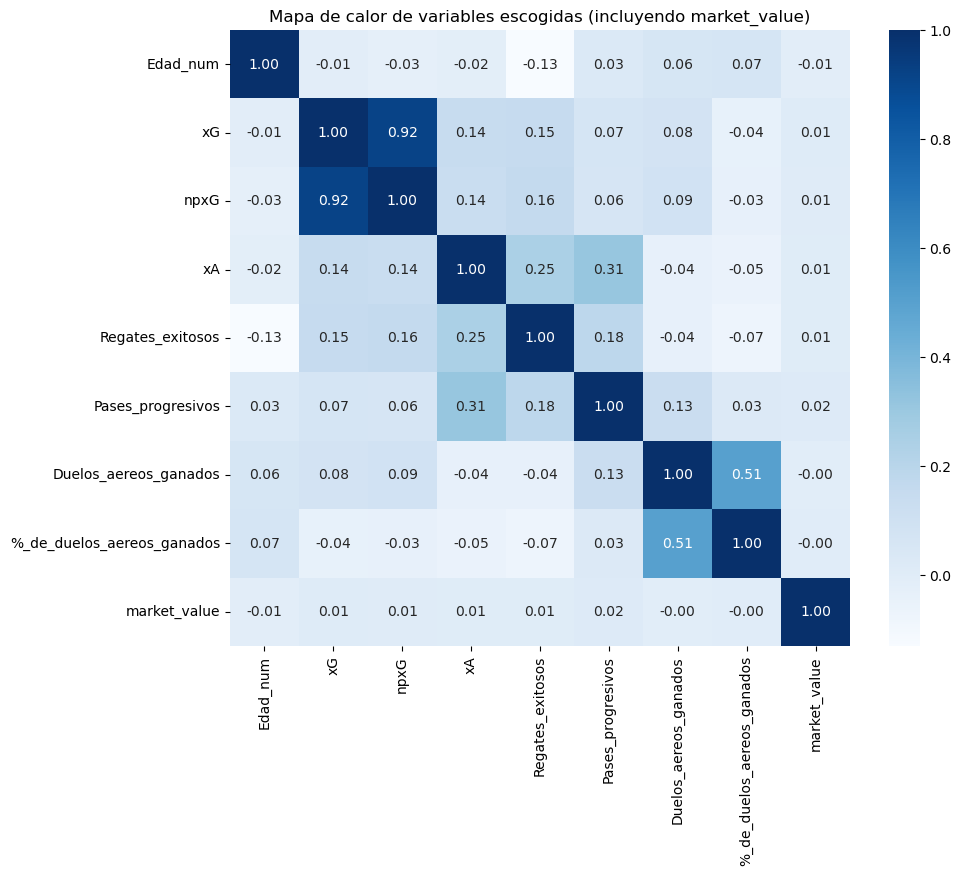

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables que decidimos incluir
features = [
    "Edad_num", 
    "Goles_log", "xG", "npxG", "xA",
    "Regates_exitosos", "Pases_progresivos",
    "Duelos_aereos_ganados", "%_de_duelos_aereos_ganados",
    "market_value"   # incluimos el target para ver su relación
]

# Nos quedamos solo con las que sí existan en df
features = [f for f in features if f in df.columns]

# Matriz de correlaciones
corr_features = df[features].corr()

# Graficar heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_features, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title("Mapa de calor de variables escogidas (incluyendo market_value)")
plt.show()
